# Polinomial regression

## Importing the libraries

In [102]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Importing the data set

In [103]:
dataset = pd.read_csv("./Position_Salaries.csv")

# taking (level) column as feature and store it in X variable
X = dataset.iloc[: , 1:-1]

# taking dependent variable (salary) as the variable we want to predict
y = dataset.iloc[:, -1]


# Traning the linear regression Model

In [104]:
# # splitting data set into test set and tarining set 
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# testing linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

# Training the polynomial regression

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= 4)
# creating new features (coefficient) for the power levels from the equation
X_poly = poly_reg.fit_transform(X)

linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_poly, y)

LinearRegression()

# Visualizing the linear regression result

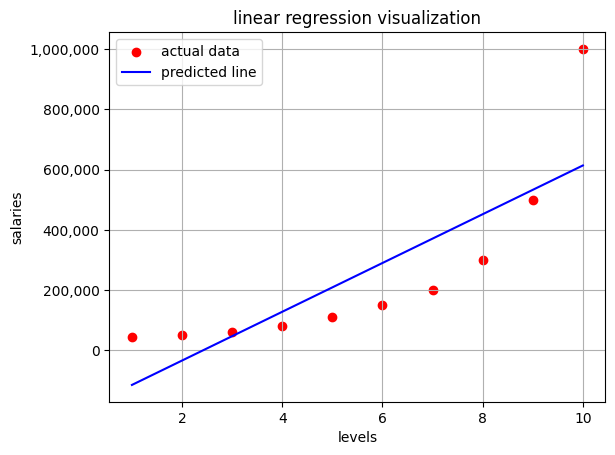

In [106]:
import matplotlib.ticker as mticker

plt.scatter(X, y, color = 'red', label = 'actual data')
plt.plot(X, linear_regressor.predict(X), color = 'blue', label = 'predicted line')
plt.legend()
plt.title('linear regression visualization')
plt.xlabel('levels')
plt.ylabel('salaries')
plt.grid(True)
# Use plain number formatting for the y-axis (salary)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

# Visualizing the polynomial regression result

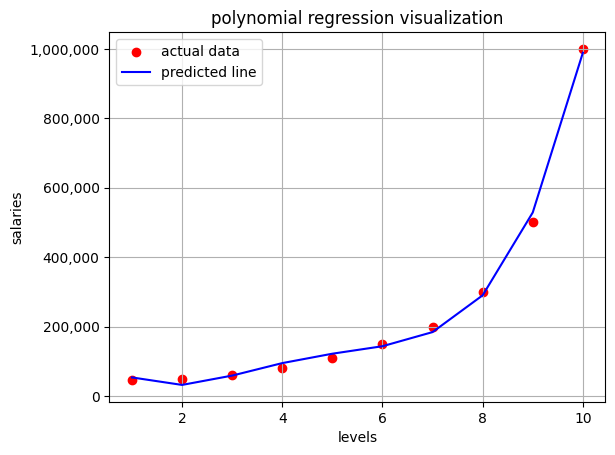

In [107]:
plt.scatter(X, y, color = 'red', label = 'actual data')
plt.plot(X, linear_regressor_2.predict(X_poly), color = 'blue', label = 'predicted line')
plt.legend()
plt.title('polynomial regression visualization')
plt.xlabel('levels')
plt.ylabel('salaries')
plt.grid(True)
# Use plain number formatting for the y-axis (salary)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

# visualizing polynomial regression for higher resolution and smoother curve

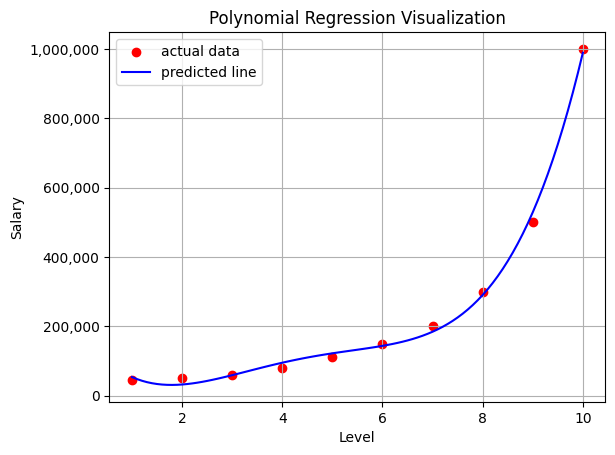

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ensure feature names match
X = dataset[['Level']]  # DataFrame with column name
y = dataset['Salary'].values.astype(float)

# Step 1: Create smooth X values (e.g., 1.0, 1.1, ..., 10.0)
X_smooth = np.arange(X['Level'].min(), X['Level'].max() + 0.1, 0.1).reshape(-1, 1)
X_smooth_df = pd.DataFrame(X_smooth, columns=['Level'])

# Step 2: Transform
X_smooth_poly = poly_reg.transform(X_smooth_df)

# Step 3: Plot
plt.scatter(X, y, color='red', label='actual data')
plt.plot(X_smooth, linear_regressor_2.predict(X_smooth_poly), color='blue', label='predicted line')
plt.legend()
plt.title('Polynomial Regression Visualization')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid(True)

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()


# Predicting with Linear regression

In [109]:
level_6_5 = pd.DataFrame([[6.5]], columns=['Level'])
predicted_salary = linear_regressor.predict(level_6_5)

print(f"someone with level 6.5 has salary of : {predicted_salary}")

someone with level 6.5 has salary of : [330378.78787879]


# Predicting with polynomial regression

In [110]:
level_6_5_poly = poly_reg.fit_transform([[6.5]])
poly_predict_salary = linear_regressor_2.predict(level_6_5_poly)
print(f"someone with level 6.5 has salary of : {poly_predict_salary}")

someone with level 6.5 has salary of : [158862.45265155]
